# Walmart Store Comparison Analysis

As part of a Kaggle competition from 5 years ago, Kaggle was able to obtain very detailed store data from Walmart on 45 Walmart
stores across the US.  The data includes weekly revenue by department for each store in the data set, as well as supplemental 
data such as type of store (assumed to be Walmart Supercenter, standard Walmart, and Walmart Neighborhood), size of store (in 
square feet); weekly stats by store on average temperature, unemployment rate, CPI; and info on holiday weekends.  

My experiment will be focused on running a 6-week TV ad campaign in the areas of the stores that had the lowest revenue per 
square foot in 2012.  My assumption is that each store in the dataset is in a different city so that results won't be biased.
My hypothesis is that the revenue for those stores that were targets of the TV campaigns will see greater increases (measured
by percentage of revenue) than those that did not receive the TV ads.  

There are three files that comprise the data set:                                                                         
**stores.csv**:  This file is a small file that lists each store along with category (A, B, or C) and size in sq. ft.       
**train.csv**:  This file provides weekly sales data per store per department                                                  
**features.csv**:  This file lists the extraneous variables for each store by week (temp, unemployment, CPI, etc.)    
    
For this experiment I will only be using the stores.csv and train.csv files.  Future experiments could involve using the features.csv file as well.        


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
stores = pd.read_csv('c:/thinkful/stores.csv')
stores.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


A    22
B    17
C     6
Name: Type, dtype: int64

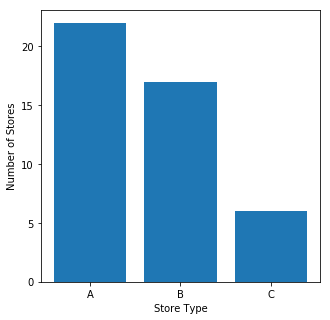

In [3]:
plt.figure(figsize=(5, 5))
plt.ylabel('Number of Stores')
plt.xlabel('Store Type')

#plt.bar(stores.Type.value_counts().index[0:],df4[0:])
plt.bar(stores.Type.value_counts().index[0:],stores.Type.value_counts()[0:])
stores.Type.value_counts()

We can see from the stores file how the different stores are divided up.  For the ad campaign, and to keep this simple (for now),
I will use chose the 4 lowest performing stores of Type A.  

Next let's read the sales info data from the train file.

In [4]:
sales_info = pd.read_csv('c:/thinkful/train.csv')
sales_info.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,1,2/12/2010,46039.49,True
2,1,1,2/19/2010,41595.55,False
3,1,1,2/26/2010,19403.54,False
4,1,1,3/5/2010,21827.90,False
5,1,1,3/12/2010,21043.39,False
6,1,1,3/19/2010,22136.64,False
7,1,1,3/26/2010,26229.21,False
8,1,1,4/2/2010,57258.43,False
9,1,1,4/9/2010,42960.91,False


Note that the sales data is per department per week, starting in 2010. I'm not concerned about the department sales for this
experiement, so I will need to create a data set that sums revenue from all departments into each week for each store.

In [5]:
sales_info_dates = sales_info['Date'].unique()   # This list stores the dates for each weekly sum per store
sales_sum = [] # This is the list which will store each store's weekly sales
sales_sum_date = [] #This list stores each date to index
sales_sum_store = [] # This maps 

for store in range(1,len(stores)+1):
    for date in sales_info_dates:
        sales_sum.append(sales_info.loc[(sales_info['Store'] == store) & (sales_info['Date'] == date), 'Weekly_Sales'].sum())
        sales_sum_date.append(date)
        sales_sum_store.append(store)

total_weekly_sum = pd.DataFrame(columns=['Store','Date','Sales'])
total_weekly_sum['Store']=sales_sum_store
total_weekly_sum['Date']=sales_sum_date
total_weekly_sum['Sales']=sales_sum

total_weekly_sum

,Store,Date,Sales
0,1,2/5/2010,1643690.90
1,1,2/12/2010,1641957.44
2,1,2/19/2010,1611968.17
3,1,2/26/2010,1409727.59
4,1,3/5/2010,1554806.68
5,1,3/12/2010,1439541.59
6,1,3/19/2010,1472515.79
7,1,3/26/2010,1404429.92
8,1,4/2/2010,1594968.28
9,1,4/9/2010,1545418.53


Now we have the the sums of all the departments per week for each store. We will use this dataframe later so we can extract the applicable weeks that we plan to test.

There's one more step we need to take to determine overall store performance, which is to take the average per sq ft for each store across the entire data set.

In [6]:
total_store_sum=[]
for store in range(1,len(stores)+1):
    total_store_sum.append(total_weekly_sum.loc[(total_weekly_sum['Store'] == store), 'Sales'].sum())
stores['Total_store']=total_store_sum
stores['Avg_sq_ft']=total_store_sum/stores.Size # this 
stores.sort_values('Avg_sq_ft')


,Store,Type,Size,Total_store,Avg_sq_ft
8,9,B,125833,7.778922e+07,618.194106
14,15,B,123737,8.913368e+07,720.347866
20,21,B,140167,1.081179e+08,771.350453
24,25,B,128107,1.010612e+08,788.881007
31,32,A,203007,1.668192e+08,821.741350
28,29,B,93638,7.714155e+07,823.827445
7,8,A,155078,1.299512e+08,837.973027
33,34,A,158114,1.382498e+08,874.367627
39,40,A,155083,1.378703e+08,889.009819
27,28,A,206302,1.892637e+08,917.410789


<BarContainer object of 45 artists>

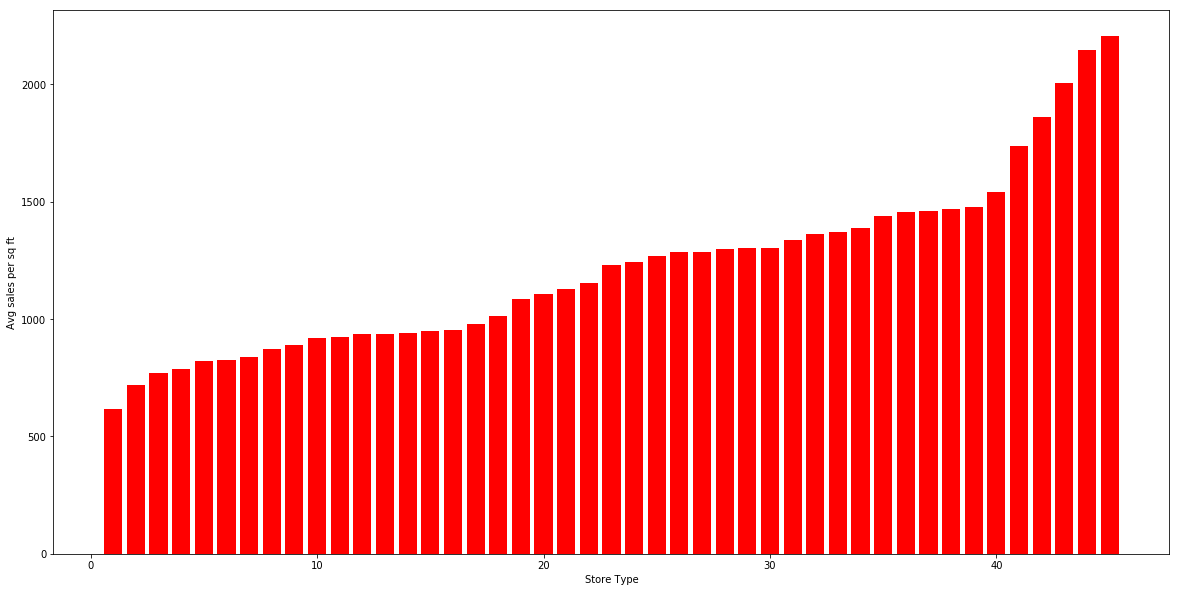

In [7]:
plt.figure(figsize=(20,10))
plt.ylabel('Avg sales per sq ft')
plt.xlabel('Store Type')

#plt.bar(stores.Type.value_counts().index[0:],df4[0:])
plt.bar(stores.Store[0:],stores.Avg_sq_ft[0:].sort_values(ascending=True), color='red')
#stores.Type.value_counts()

Now we can see which stores we will use to run our TV experiment.  As mentioned earlier, we will focus on the four stores
of Type A (Stores 29, 7, 33, 39) to perform our analysis.  We need to pick 6 weeks for each of these, and they should probably 
be consecutive weeks.  Let's start the first week of June.  Assuming we're running this in 2013 (since the data ends in 2012),
we will start on June 1. We will need to compare these results to the 2011 dates as well to gauge the increase, so let's pull 
those dates as well.


Now we need to create a dataset for the stores

In [8]:
weeks_2011 = ['6/3/2011','6/10/2011','6/17/2011','6/24/2011','7/1/2011','7/8/2011']
weeks_2012 = ['6/1/2012','6/8/2012','6/15/2012','6/22/2012','6/29/2012','7/6/2012']

A_Stores = [8,32,34,40]

tv_2012_A = pd.DataFrame(columns = ['Store','Week_2011','Sales_2011','Week_2012','Sales_2012','YoY_increase'])
tv_stores = []  # temporary lists to store values and then add to the tv_2012_A dataframe
tv_week2011 = []
tv_sales2011 = []
tv_week2012 = []
tv_sales2012 = []                                  
                                    
for store in range(0,len(A_Stores)):
    for week in range(0,len(weeks_2012)):
#        tv_2012_A.Sales.append(total_weekly_sum.loc[(total_weekly_sum['Date']==weeks_2012[week]) & (total_weekly_sum['Store']==A_Stores[store]),'Sales'].values[0])
        tv_sales2011.append(total_weekly_sum.loc[(total_weekly_sum['Date']==weeks_2011[week]) & (total_weekly_sum['Store']==A_Stores[store]),'Sales'].values[0])
        tv_sales2012.append(total_weekly_sum.loc[(total_weekly_sum['Date']==weeks_2012[week]) & (total_weekly_sum['Store']==A_Stores[store]),'Sales'].values[0])
        tv_stores.append(A_Stores[store])
        tv_week2011.append(weeks_2011[week])
        tv_week2012.append(weeks_2012[week])

#append(total_weekly_sum.loc[(total_weekly_sum['Store'] == store), 'Sales'].sum())
tv_2012_A['Store'] = tv_stores
tv_2012_A['Sales_2011'] = tv_sales2011
tv_2012_A['Week_2011'] = tv_week2011
tv_2012_A['Sales_2012'] = tv_sales2012
tv_2012_A['Week_2012'] = tv_week2012
tv_2012_A['YoY_increase'] = tv_2012_A.Sales_2012/tv_2012_A.Sales_2011

tv_2012_A


,Store,Week_2011,Sales_2011,Week_2012,Sales_2012,YoY_increase
0,8,6/3/2011,929222.16,6/1/2012,921161.20,0.991325
1,8,6/10/2011,897309.41,6/8/2012,928820.00,1.035117
2,8,6/17/2011,922048.41,6/15/2012,916918.70,0.994437
3,8,6/24/2011,864881.24,6/22/2012,899449.65,1.039969
4,8,7/1/2011,883683.35,6/29/2012,878298.22,0.993906
5,8,7/8/2011,861965.12,7/6/2012,936205.50,1.086129
6,32,6/3/2011,1167757.00,6/1/2012,1157557.79,0.991266
7,32,6/10/2011,1239741.34,6/8/2012,1246322.44,1.005308
8,32,6/17/2011,1192031.38,6/15/2012,1234759.54,1.035845
9,32,6/24/2011,1163869.52,6/22/2012,1196880.11,1.028363


We now have the subset of the 4 lowest performing 'A' stores by week during the 6 weeks that we want to compare our TV ad campaign to, as well as a YoY comparison of increase in sales.

Now the experiment requires us to run the TV ad campaign in the 4 markets we've defined during the 6-week period.  Once the campaign concludes, we will be able to take the data that we've accumulated each week for each store and then compare the overall results.

Success of the campaign would assume a greater increase between 2012 and 2013 than between 2011 and 2012.  Thus we would expect that the corresponding week of 6/22/2012 for store number 39 (which had a 2011-12 increase of about 12%) to be at least 13%, if we went by a pure week-to-week comparison.  A broader way to measure it would be to take the average YoY increase of the whole 6-week period and determine if it indeed was greater than the corresponding week from the previous year.  We will also want to compare the average increase of these stores vs. the rest of the stores in the data set, as we want to determine if TV advertising did contribute to the increase as opposed to "organic" growth (i.e., economy doing better overall, stores offering more items, etc.).

There are also many other ways we could explore this dataset:  how did individual departments do YoY, what increases may have been seen beyond the 6-week period, and factoring in several of the other variables that are included (such as average temperatures, unemployment rates, etc.).